# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотеки

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

Импортируем датасет и сохраним его в переменной `data`. Разделитель данных в столбцах - знак табуляции `\t`.

In [122]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Посмотрим первые 10 строк таблицы.

In [123]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию о данных.

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 22 столбца. Типы данных столбцах разные — `object`, `int`, `float`, `bool`.

Согласно документации к данным, столбцы отражают следующее:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Можно сказать, что "нарушение стиля" есть только в одном столбце - `cityCenters_nearest`.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Посмотрим подробную информацию о значениях в столбцах:

In [125]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Можно заметить следующие особенности:
- В столбцах определенно есть выбросы, например минимальная цена `last_price` - 12190 рублей (возможно, в данные попало объявление об аренде, а не продаже).
- Также в столбцах есть значения, которые необходимо будет заменить. Например, значение 0 в столбце `rooms`, или значение 1 м и 100 м в столбце `ceiling_heiht`.
- Каким-то образом в столбцах `ponds_around3000` и `parks_around3000` оказались числа с плавающей точкой. Возможно, только часть водоема и парка попадает в радиус 3 км...

Эти особенности необходимо иметь в виду при дальнейшей предобработке данных.

**Вывод**

В каждой строке таблицы - данные о квартирах на продажу в Санкт-Петербурге, на основе которых необходимо научиться определять рыночную стоимость квартиры.

Небольшой анализ данных в столбцах показал, что в них есть как выбросы, так и значения, которые необходимо заменить прежде чем начинать предсказывать стоимость квартир.

## Предобработка данных

### Обработка дубликатов

Проверим датасет на дубликаты.

In [126]:
data.duplicated().sum()

0

Видно, что в исходном датасете отсутствуют явные дубликаты.

Но не нужно забывать про неявные дубликаты. Их источником могут быть, например, разные написания населенных пунктов. Проверим список уникальных значений в столбце `locality_name`.

In [127]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видно, что в столбцах есть неявные дубликаты, например, разные написания слова "поселок".

Напишем функцию, которая возвращает только названия населенных пунктов, без их типа.

In [128]:
def duplicate_names(data):
    duplicated_names = ['посёлок при железнодорожной станции',
                   'поселок станции',
                   'посёлок станции',
                   'поселок городского типа имени',
                   'посёлок городского типа имени',
                   'поселок городского типа',
                   'посёлок городского типа',
                   'городской посёлок',
                   'городской поселок',
                   'коттеджный поселок',
                   'коттеджный посёлок',
                   'посёлок',
                   'поселок',                 
                   'деревня',
                   'садоводческое некоммерческое товарищество',
                   'садовое товарищество',
                   'село']
    try:
        for names in duplicated_names:
            if names in data['locality_name']:
                return data['locality_name'].replace(names+' ', '')
        return data['locality_name']
    except:
        return data['locality_name']

Создадим новый столбец с наименованием населенного пункта без типа.

Также необходимо заполнить все отсутствующие значения в полученном столбце значениями из изначального столбца (для населенных пунктов, в которых тип не указан).

In [129]:
data['locality_name'] = data.apply(duplicate_names,axis=1)

Проверим список уникальных значений в столбце еще раз.

In [130]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Житково', 'Заводской',
       'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы',
       'Ивангород', 'Извара', 'Ильичёво', 

Похоже, что от неявных дубликатов удалось избавиться.

Проверим явные дубликаты еще раз.

In [131]:
data.duplicated().sum()

0

Видно, что удаление неявных дубликатов не привело к появлению явных дубликатов во всем датасете.

Но все же, для дальнейшего анализа неявные дубликаты в столбце с населенными пунктами нам бы только помешали.

### Обработка пропусков

Обработаем пропуски в каждом из столбцов, где они встречаются:
- `ceiling_height`
- `floors_total`
- `living_area`
- `is_apartment`
- `kitchen_area`
- `balcony`
- `locality_name`
- `airports_nearest`
- `cityCenters_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`
- `days_exposition` 

#### Столбец `ceiling_height`

В данном случае предлагается заменить отсутствующие значения на медианное значение по всем квартирам, так как обычно потолки в квартирах стандартные.

In [132]:
median_height = data['ceiling_height'].median()
data['ceiling_height'].fillna(median_height, inplace=True)

#### Столбец `floors_total`

В данном столбце отсутствующие значения заменить затруднительно. Например, можно значения на медианные, но в таком случае возникнут ситуации, когда общее количество этажей будет меньше этажа, на котором находятся квартиры.

Поэтому пока предлагается заменить отсутствующие значения на 0.

In [133]:
data['floors_total'].fillna(0, inplace=True)

#### Столбец `living_area`

В данном столбце предлагается умножить значения общей площади на медианную долю жилой площади для других квартир, так как обычно эти доли в квартирах тоже стандартные.

In [134]:
median_living_area_fraction = (data['living_area']/data['total_area']).median()
data['living_area'].fillna(median_living_area_fraction*data['total_area'], inplace=True)

#### Столбец `is_apartment`

Делаем предположение, что если значения в данном столбце нет, то это значит, что такие квартиры не являются апартаментами. Поэтому предлагается заменить все отсутствующие значения на `False`.

In [135]:
data['is_apartment'].fillna(False, inplace=True)

#### Столбец `kitchen_area`

В данном столбце предлагается повторить те же вычисления, что и для столбца с жилой площадью.

In [136]:
median_kitchen_area_fraction = (data['kitchen_area']/data['total_area']).median()
data['kitchen_area'].fillna(median_kitchen_area_fraction*data['total_area'], inplace=True)

#### Столбец `balcony`

Заменим все отсутствующие значения на 0. Делаем предположение, что если значение отсутствует, то балкона в квартире нет.

In [137]:
data['balcony'].fillna(0,inplace=True)

#### Столбец `locality_name`

В данном случае заменить пропуски также проблематично. Предлагается заменить их на самое популярное название населенного пункта в датасете.

In [138]:
data['locality_name'].value_counts()

Санкт-Петербург            15721
Мурино                       590
Кудрово                      472
Шушары                       440
Всеволожск                   398
                           ...  
Пустынка                       1
Платформа 69-й километр        1
Мыза-Ивановка                  1
Ропша                          1
Пельгора                       1
Name: locality_name, Length: 305, dtype: int64

In [139]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Видно, что больше половины строк относятся к Санкт-Петербургу. Отсутствующих значений в столбце всего 49, поэтому предлагаемая замена не должна дать большого искажения данных в дальнейшем. 

In [140]:
data['locality_name'].fillna(data['locality_name'].value_counts().index[0], inplace=True)

#### Столбец `airports_nearest`

В данном столбце замену пока что предлагается не проводить. Согласно описанию, этот столбец заполнялся автоматически на основе картографических данных. По всей видимости, для этих квартир расстояние до ближайшего аэропорта более какого-то максимального значения, выше которого считается, что аэропортов вблизи квартиры нет.

#### Столбец `cityCenters_nearest`

В данном столбце ситуация та же, что и с предыдущим столбцом `airports_nearest`.

#### Столбец `parks_around3000`

Делаем предположение, что отсутствующее значение в данном столбце значит отсутствие парка в радиусе 3 км. Поэтому заменяем отсутствующие значения на 0.

In [141]:
data['parks_around3000'].fillna(0, inplace=True)

#### Столбец `parks_nearest`

В данном столбце ситуация та же, что и с предыдущим столбцом `airports_nearest`.

#### Столбец `ponds_around3000`

Тоже делаем предположение, что отсутствующее значение в данном столбце значит отсутствие пруда в радиусе 3 км. Поэтому заменяем отсутствующие значения на 0.

In [142]:
data['ponds_around3000'].fillna(0, inplace=True)

#### Столбец `ponds_nearest`

В данном столбце ситуация та же, что и с предыдущим столбцом `airports_nearest`.

#### Столбец `days_exposition`

Делаем предположение, что отсутствующее значение означает, что с размещения до снятия в данном случае не проходило полного дня.

Посмотрим минимальное значение в данном столбце.

In [143]:
data['days_exposition'].min()

1.0

Видно, что в датасетах есть значения только от одного полного дня, что может быть подтверждением выдвинутого выше предположения.

Поэтому заменим отсутствующие значения в данном столбце на 0.

In [144]:
data['days_exposition'].fillna(0,inplace=True)

Проверим еще раз датасет на количество отсутствующих значений.

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Видно, что отсутствущие значения остались только в столбцах, в которых автоматически рассчитывалось расстояние до ближайшего аэропорта, парка и пруда. Данные пропуски было предложено не трогать.

### Смена типов данных

Посмотрим на типы данных в датасете.

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Предлагается заменить типы данных в следующих столбцах:
- `last_price` на `int`, так как цены в целых рублях должно быть достаточно.
- `first_day_exposition` на `datetime`, так как этот формат облегчит нам дальнейший анализ.
- `floors_total` на `int`, так как количество этажей не должно быть числом с плавающей точкой.
- `balcony` на `int`, так как количество балконов не должно быть числом с плавающей точкой.
- `parks_around3000` на `int`, так как количество парков в радиусе 3 км не должно быть числом с плавающей точкой (напоминаю, что выше было выдвинуто предположение, что причиной этого может быть то, что в радиус 3 км попадает только часть парка и автоматическая система вписала долю парка).
- `ponds_around3000` на `int`, так как ситуация такая же, как и с парками.
- `days_exposition` на `int`, так как количество дней, пока объявление было активным не должно быть числом с плавающей точкой.

In [147]:
columns_to_int = ['last_price', 'floors_total', 'balcony', 
                  'parks_around3000', 'ponds_around3000', 'days_exposition']
for columns in columns_to_int:
    data[columns] = data[columns].astype('int')

In [148]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим типы данных еще раз.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000

Видно, что все типы данных были заменены, как и требовалось.

**Вывод**

В данном пункте была проведена предобработка данных:
- Обработаны пропуски в значениях для каждого столбца и предложены обоснованные замены, где это возможно.
- Были обоснованы причины и проведена смена типа данных в некоторых столбцах.

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

Рассчитаем цену квадратного метра для каждой квартиры.

In [150]:
data['square_meter_price'] = data['last_price']/data['total_area']

Построим график "ящик с усами" для данного столбца.

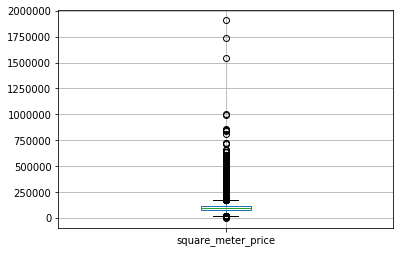

In [151]:
data.boxplot('square_meter_price')

Видно, что в данном столбце наблюдается некоторое количество "выбросов" с ценой за квадратный метр больше чем 250000 руб/м$^2$. Эту информацию необходимо держать в голове при дальнейшем анализе.

### День недели, месяц и год публикации объявления

Добавим в таблицу день недели, месяц и год публикации объявления для каждой квартиры.

In [152]:
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

Проверим значения в добавленных столбцах.

In [153]:
data.loc[:,['first_day_exposition','exposition_year','exposition_month','exposition_weekday']]

,first_day_exposition,exposition_year,exposition_month,exposition_weekday
0,2019-03-07,2019,3,3
1,2018-12-04,2018,12,1
2,2015-08-20,2015,8,3
3,2015-07-24,2015,7,4
4,2018-06-19,2018,6,1
...,...,...,...,...
23694,2017-03-21,2017,3,1
23695,2018-01-15,2018,1,0
23696,2018-02-11,2018,2,6
23697,2017-03-28,2017,3,1


Видно, что добавленные значения соответствуют первоначальной дате. День недели для первой даты 7 марта 2019 года - чертверг. При этом значение в столбце `exposition_weekday` - 3. То есть понедельнику в данном столбце соответствует 0. Эту информацию необходимо держать в голове при дальнейшем анализе.

### Этаж квартиры

В данном столбце добавим информацию о том, на каком этаже расположена квартира: первом, последнем или другом.

Вспомним, что в части объявлений не было информации о том, сколько этажей в доме. Предлагается добавить такие квартиры в категорию этажей "другой".

Сначала напишем функцию по категоризации квартир.

Категоризацию будем проводить следующим образом:
- Если в доме больше чем 1 этаж, то квартиру на 1 этаже относим к категории "первый".
- Если в доме больше чем 1 этаж, то квартиру на этаже, равном количеству этажей относим к категории "последний".
- В любом другом случае квартира относится к категории "другое", в том числе квартиры с отсутствующими значениями общего числа этажей.

In [154]:
def categorize_floor(row):
    if row['floors_total'] > 1:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
    return 'другое'

In [155]:
data['floor_group'] = data.apply(categorize_floor,axis=1)

Проверим правильность категоризации.

Посмотрим список уникальных значений категорий для квартир на 1 этаже в домах с количеством этажей больше 1.

In [156]:
data[(data['floor'] == 1) & (data['floors_total'] > 1)]['floor_group'].unique()

array(['первый'], dtype=object)

Сделаем то же самое для квартир на 1 этаже в домах с общим количеством этажей равным 1.

In [157]:
data[(data['floor'] == 1) & (data['floors_total'] == 1)]['floor_group'].unique()

array(['другое'], dtype=object)

Сделаем то же самое для квартир на последнем этаже.

In [158]:
data[(data['floor'] == data['floors_total']) & (data['floors_total'] > 1)]['floor_group'].unique()

array(['последний'], dtype=object)

Сделаем то же самое для квартир с пропущенным значением в столбце количества этажей.

In [159]:
data[data['floors_total'] == 0]['floor_group'].unique()

array(['другое'], dtype=object)

Видно, что категории были определены верно.

### Соотношение площадей

В данном пункте добавим столбец с соотношением жилой и общей площади, а также отношение площади кухни к общей.

In [160]:
data['living_area_ratio'] = data['living_area']/data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']

Построим графики "ящик с усами" для новых столбцов.

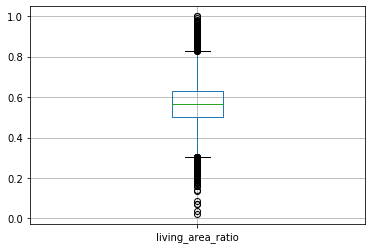

In [161]:
data.boxplot('living_area_ratio')

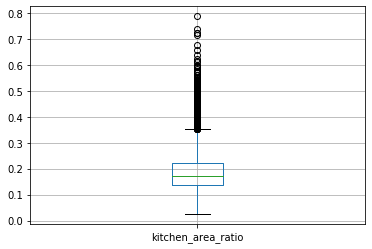

In [162]:
data.boxplot('kitchen_area_ratio')

Видно, что в данных есть аномально большие значения для долей жилой площади и площади кухни к общей площади. Возможно это выбросы, возможно в случае "студий" вся площадь квартиры относится к жилой, а может быть значения площадей в данных квартирах были внесены неверно. Будем держать эту информацию в голове при дальнейших исследованиях данных.

**Вывод**

В данном пункте были добавлены дополнительные столбцы в датасет, которые облегчат дальнейший анализ данных.

## Исследовательский анализ данных

### Изучение распределений параметров квартир

#### Площадь

Построим гистограмму распределений площадей квартир.

Для начала посмотрим на информацию по данному столбцу.

In [163]:
data.describe()['total_area']

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Видно, что в данных есть "выбросы", что надо учитывать при построении гистограмм (например, квартира площадью 900 м$^2$). Также видно, медианное значение площади - 52 м$^2$, среднее - 60 м$^2$.

Построим гистограмму.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca80cf050>]],
      dtype=object)

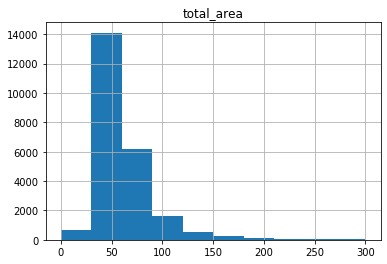

In [164]:
data.hist('total_area',range=(0,300),bins=10)

Гистограмма лишь подтверждает выводы, приведенные выше.

#### Доля площади кухни и жилой площади

Опишем данные и построим распределения для первого параметра.

In [165]:
data.describe()['kitchen_area_ratio']

count    23699.000000
mean         0.185919
std          0.069512
min          0.025381
25%          0.136859
50%          0.172414
75%          0.223717
max          0.787879
Name: kitchen_area_ratio, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7d97990>]],
      dtype=object)

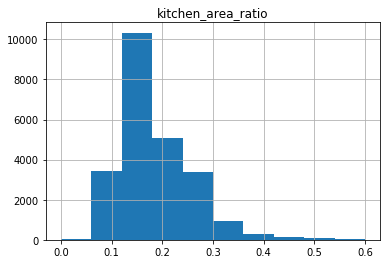

In [166]:
data.hist('kitchen_area_ratio',range=(0,0.6),bins=10)

Видно, что в средняя доля кухни к общей площади для квартир составляет 0.186, что очень близко к медианному значению 0.172. Можно сделать вывод, что в основном для квартир это значение стандартно.

Проделаем то же самое для второго параметра.

In [167]:
data.describe()['living_area_ratio']

count    23699.000000
mean         0.565014
std          0.101053
min          0.021583
25%          0.500000
50%          0.567860
75%          0.631579
max          1.000000
Name: living_area_ratio, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7dc0ad0>]],
      dtype=object)

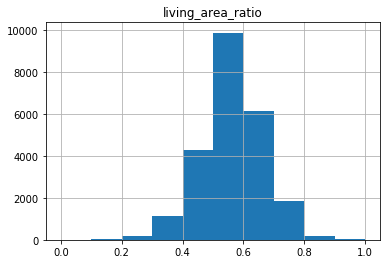

In [168]:
data.hist('living_area_ratio',range=(0,1),bins=10)

В данном случае среднее и медиана даже ближе. Это говорит о том, что обычно в квартирах доля жилой площади к основной одинакова, и равна около 0.566.

#### Цена

Построим гистограмму распределений цены квартир.

Для начала посмотрим на информацию по данному столбцу.

In [169]:
data.describe()['last_price']

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данном случае видно, что медианное значение цены - 4.65 млн рублей. Среднее - 6.5 млн. рублей. Однако, тут тоже есть "выбросы" (например, цена квартиры в 763 млн рублей).

Построим гистограмму.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7cbaa10>]],
      dtype=object)

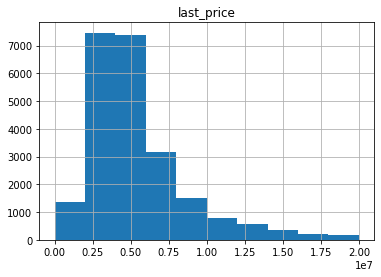

In [170]:
data.hist('last_price',range=(0,20e6),bins=10)

В данном случае гистограмма так же подтверждает выводы, представленные выше.

#### Число комнат

Построим гистограмму распределений количества комнат в квартирах.

Для начала посмотрим на информацию по данному столбцу.

In [171]:
data.describe()['rooms']

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Медианное и среднее значение количества комнат - 2. Также есть "выбросы" в виде квартир с 19 комнатами. Также в датасете существуют квартиры с количеством комнат 0, возможно так обозначают студии.

Построим гистограмму.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7c41fd0>]],
      dtype=object)

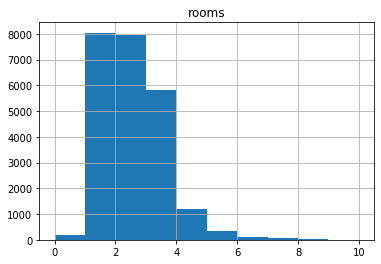

In [172]:
data.hist('rooms',range=(0,10),bins=10)

Гистограмма тоже подтверждает представленные выше выводы.

#### Высота потолков

Построим гистограмму распределений высоты потолков в квартирах.

Для начала посмотрим на информацию по данному столбцу.

In [173]:
data.describe()['ceiling_height']

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение высоты потолков - 2.65 м, среднее - 2.72 м. Также есть "выбросы" в виде квартиры с высотой потолков 100 м и квартиры с высотой потолков 1 м.

Построим гистограмму.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca66bf8d0>]],
      dtype=object)

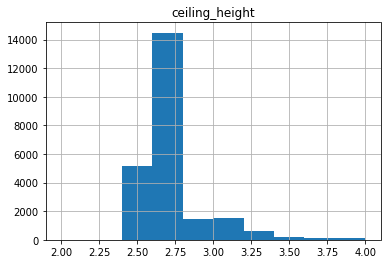

In [174]:
data.hist('ceiling_height',range=(2,4),bins=10)

Гистограмма тоже подтверждает представленные выше выводы.

#### Время продажи квартиры

Построим гистограмму распределений времени продаж квартир.

Для начала посмотрим на информацию по данному столбцу.

In [175]:
data.describe()['days_exposition']

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видно, что медианное значение продажи составляет 74 дня, среднее - 156 дней. Но в датасете также есть выбросы (например, квартира, которую продавали 1580 дней или 5 лет. Хотя кто знает, может это не выброс).

Построим гистограмму.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca6877b50>]],
      dtype=object)

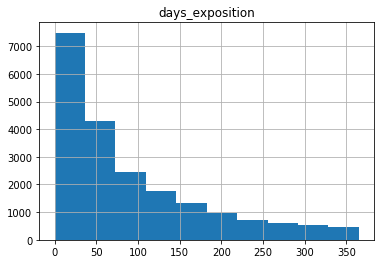

In [176]:
data.hist('days_exposition',range=(0,365),bins=10)

На гистограмме виден пик в районе 0 дней. Его нужно дополнительно исследовать.

Сделаем гистограмму уже.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7e25bd0>]],
      dtype=object)

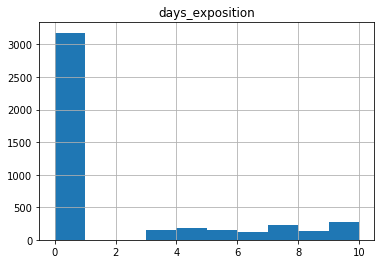

In [177]:
data.hist('days_exposition',range=(0,10),bins=10)

Видно, что в датасете наблюдается большое количество квартир, время продажи которых составляет 0 дней. Причины появлений таких значений следующие:
- Квартиры покупали в день подачи объявления, что является довольно сомнительным.
- Эти обявления - мошеннические и блокировались в течение дня.

Опишем данные еще раз, не учитывая эти значения. Также построим гистограмму.

In [178]:
data.query('1 < days_exposition').describe()['days_exposition']

count    20517.000000
mean       180.897402
std        219.729754
min          2.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7ede790>]],
      dtype=object)

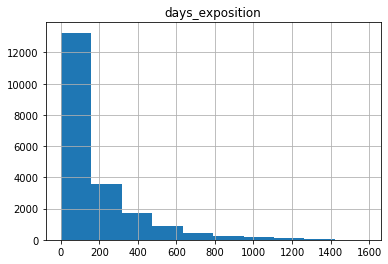

In [179]:
data.hist('days_exposition',range=(1,data['days_exposition'].max()),bins=10)

Видно, что теперь медианным значением стало 95 дней. Однако, среднее все еще сильно смещено от медианного. Но в любом случае можно сказать, что половина квартир продавалась в течение первых 3 месяцев, и в среднем они продавались в течение полугода.

Для того, чтобы изучить аномально быстрые и аномально долгие продажи, построим гистограммы первого и последнего квартилей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca8045c10>]],
      dtype=object)

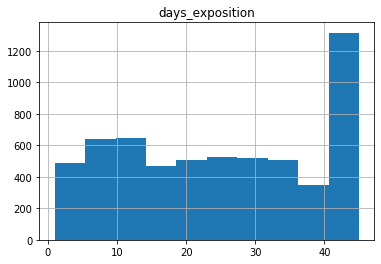

In [180]:
data.hist('days_exposition',
          range=(1,data.query('1 < days_exposition').describe()['days_exposition']['25%']),
          bins=10)

В данном случае тяжело выделить аномально быстрые продажи. Выше мы уже удалили большую часть аномально быстрых продаж в течение дня публикации объявления.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca7bbacd0>]],
      dtype=object)

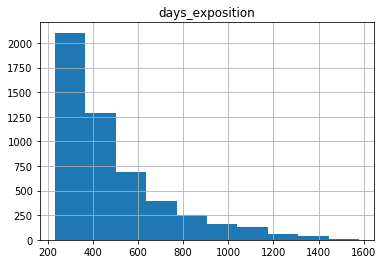

In [181]:
data.hist('days_exposition',
          range=(data.query('1 < days_exposition').describe()['days_exposition']['75%'],
                                    data['days_exposition'].max()),
          bins=10)

В данном случае также тяжело выделить аномально долгие продажи. По всей видимости для того, чтобы это сделать, нужно исходить из логики продаж недвижимости. Нужно учесть, например, в течение какого времени объявление висит на сайте без удаления и т.п.

### Что влияет на стоимость квартиры

Изучим распределение цены квартиры от различных факторов.

#### Площадь

Для начала построим диаграмму рассеяния по данным столбцам.

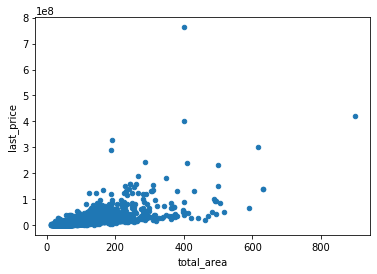

In [182]:
data.plot(x='total_area', y='last_price', kind='scatter')

Видно, что в данных наблюдаются значения, искажающие график, а именно, аномально большие стоимости квартир.

Определим квартиры стоимостью более 200 млн как "выбросы" и перестроим график.

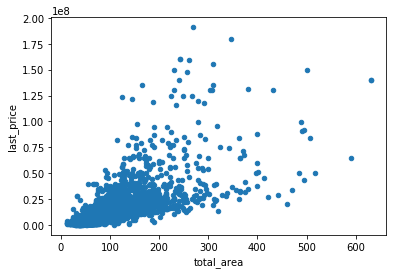

In [183]:
data.query('last_price < 2e8').plot(x='total_area', y='last_price', kind='scatter')

Посчитаем коэффициент корреляции для данных, представленных на графике.

In [184]:
data.query('last_price < 2e8')['last_price'].corr(data['total_area'])

0.739816773216643

Коэффициент составил 0.74. Согласно литературе [1], такое значение говорит о сильной корреляции в данных, при чем с ростом одного значение растет другое.

1. https://tocodata.com/marketing/korrelyaciya.html

Такой результат ожидаем, ведь действительно цена квартиры должна увеличиваться при увеличении ее площади.

#### Количество комнат

Для начала построим диаграмму рассеяния по данным столбцам.

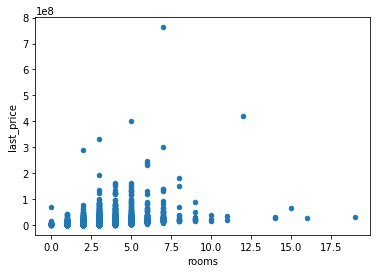

In [185]:
data.plot(x='rooms', y='last_price', kind='scatter')

Уберем "выбросы" и перестроим график.

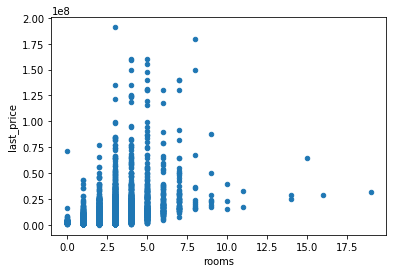

In [186]:
data.query('last_price < 2e8').plot(x='rooms', y='last_price', kind='scatter')

Посчитаем коэффициент корреляции.

In [187]:
data.query('last_price < 2e8')['last_price'].corr(data['rooms'])

0.4359131382980649

В данном случае коэффициент корреляции менее 0.5, что говорит о слабой корреляции.

Однако, на полученном графике видно, что для каждого количества комнат значения цен находятся в большой области. Это можно объяснить тем, что цена квартиры определяется не только количеством комнат.

Для большей репрезентативности можно посчитать среднюю цену квартиры для разного количества комнат и построить график еще раз. Для этого создадим сводную таблицу и построим график по ее значениям.

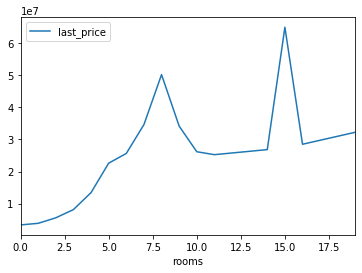

In [188]:
(pd.
    pivot_table(data.query('last_price < 2e8'), 
                index='rooms', 
                values='last_price', 
                aggfunc='mean').
    plot(kind='line')
)

Хоть на данных и наблюдается выброс для квартир с 15 и 8 комнатами, общий тренд мы выявили. В среднем цены квартир с увеличением числа комнат растут.

#### Удаленность от центра

Для начала построим диаграмму рассеяния по данным столбцам.

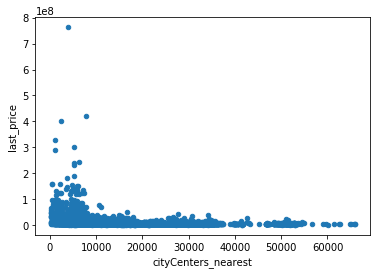

In [189]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')

Уберем "выбросы" и перестроим график.

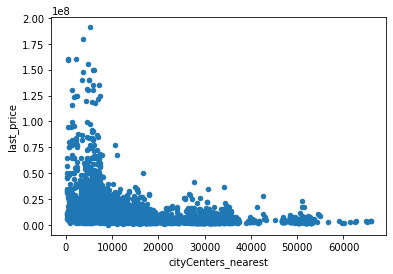

In [190]:
data.query('last_price < 2e8').plot(x='cityCenters_nearest', y='last_price', kind='scatter')

Посчитаем коэффициент корреляции.

In [191]:
data.query('last_price < 2e8')['last_price'].corr(data['cityCenters_nearest'])

-0.2676337044755274

Полученное значение также говорит о слабой корреляции.

Однако, на графике все же видно, что разброс стоимостей квартир при увеличении расстояния от центра падает. Наибольший разброс при этом для квартир с центром до 10 км. По всей видимости, считается, что такие квартиры находятся в центре.

#### Этаж

Построим столбчатую диаграмму со среднем и медианным значениям цены для всех групп этажей.

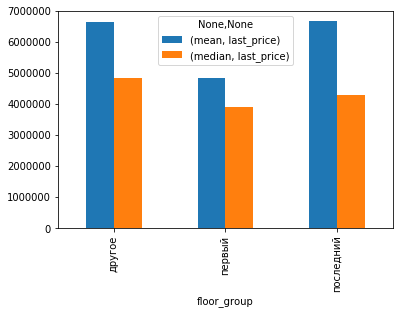

In [192]:
(pd.
    pivot_table(data.query('last_price < 2e8'), 
                index='floor_group', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='bar')
)

На графике видно, что:
- Среднее и медианное значение для квартир, находящихся на первом этаже, меньше остальных. То есть можно сделать вывод, что такие кваритиры ценятся меньше всего.
- Средняя стоимость квартир, находящихся на последнем этаже такая же, как и для всех остальных этажей. 
- Медиана цены квартир, находящихся не на первом и посленем этажах больше всего. Можно сказать, что такие квартиры ценятся больше других.

#### Год публикации

Создадим сводную таблицу со средним и медианным значениями цены квартиры в зависимости от года публикации и построим на их основе график.

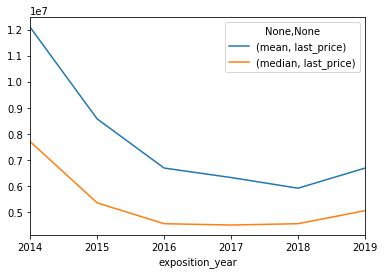

In [193]:
(pd.
    pivot_table(data.query('last_price < 2e8'), 
                index='exposition_year', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='line')
)

На графике видно, что: 
- Как средняя, так и медианная цена публикуемых квартир падала с 2014 по 2018 год. 
- После 2018 года цены начали расти.

#### Месяц публикации

Создадим сводную таблицу со средним и медианным значениями цены квартиры в зависимости от месяца публикации и построим на их основе график.

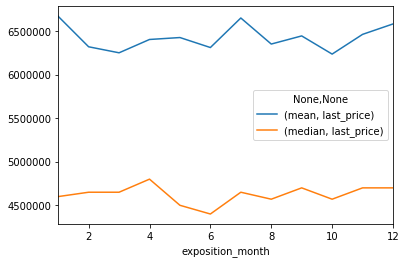

In [194]:
(pd.
    pivot_table(data.query('last_price < 2e8'), 
                index='exposition_month', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='line')
)

На полученных графиках видно, что: 
- Линейной зависимости между ценой и месяцем публикации нет. 
- В течение года цены на квартиры колеблются.

#### День недели публикации

Создадим сводную таблицу со средним и медианным значениями цены квартиры в зависимости от дня недели публикации и построим на их основе график.

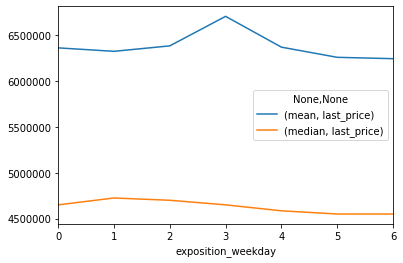

In [195]:
(pd.
    pivot_table(data.query('last_price < 2e8'), 
                index='exposition_weekday', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='line')
)

В данном случае также видно, что:
- И средние и медианные цены на квартиры тем меньше, чем позже в течение недели объявление было опубликовано.
- На зависимости средней цены наблюдается пик в четверг.

### Самые популярные населенные пункты

Посчитаем количество объявлений в разных населенных пунктах и сохраним первые 10 населенных пунктов в переменную top10.

In [196]:
top10 = data['locality_name'].value_counts()[:10]
top10

Санкт-Петербург    15770
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Отлично!

Посчитаем среднюю стоимость квадратного метра жилья в данных населенных пунктах, отсортируем по убыванию и выведем на экран.

In [197]:
(data.
 query('locality_name in @top10.index').
 pivot_table(index='locality_name',
                 values='square_meter_price',
                 aggfunc='mean').
 sort_values(by='square_meter_price',ascending=False)
)

,square_meter_price
locality_name,
Санкт-Петербург,114785.190679
Пушкин,103125.819291
Кудрово,95324.930544
Парголово,90175.913458
Мурино,86087.512050
Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


По полученным данным видно, что:
- Самый "дорогой" квадратный метр в Санкт-Петербурге.
- Дешевле всего квадратный метр в Выборге.

### Определение области центра

Создадим датасет с квартирами в Санкт-Петерурге.

In [198]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

Добавим колонку с расстоянием от центра в километрах.

In [199]:
data_spb['center_km'] = (data_spb['cityCenters_nearest']/1000).round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Теперь посчитаем среднюю стоимость квартир для каждого километра.

Создадим сводную таблицу и построим график на основе ее данных.

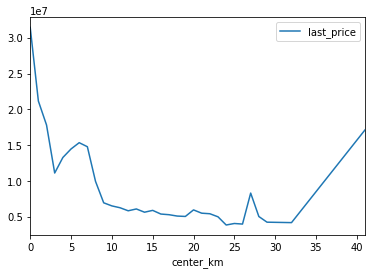

In [200]:
(data_spb.
     pivot_table(index='center_km',values='last_price',aggfunc='mean').
     plot(kind='line')
)

По всей видимости, к центральной области можно отнести квартиры, которые находятся на расстоянии менее 9 км от центра. Видно, что после этого значения цены уже не так сильно меняются.

### Изучение распределений для центральной области

Создадим новый датасет и поместим в него данные о центральных квартирах.

In [201]:
data_spb_center = data_spb.query('center_km < 9')

Используем полученный датасет для дальнейшего анализа.

#### Площадь

Изучим значения и построим гистограмму.

In [202]:
data_spb_center.describe()['total_area']

count    4140.000000
mean       90.282072
std        58.791790
min        12.000000
25%        55.000000
50%        76.000000
75%       107.000000
max       900.000000
Name: total_area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca773c710>]],
      dtype=object)

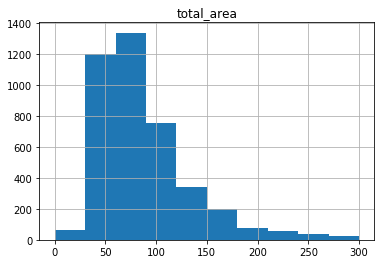

In [203]:
data_spb_center.hist('total_area',range=(0,300),bins=10)

По результатам видно, что для квартир в центральной области характерны квартиры с большей площадью:
- Среднее значение стало 90 м$^2$ вместо 60 м$^2$ для всего датасета.
- Медианное значение площади квартир составляет 76 м$^2$ вместо 52 м$^2$ для всего датасета.

#### Доля площади кухни и жилой площади

Посчитаем эти параметры для квартир, находящихся в центре.

In [204]:
data_spb_center.describe()['kitchen_area_ratio']

count    4140.000000
mean        0.174158
std         0.079127
min         0.025381
25%         0.121622
50%         0.160000
75%         0.198823
max         0.636986
Name: kitchen_area_ratio, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca77a8ed0>]],
      dtype=object)

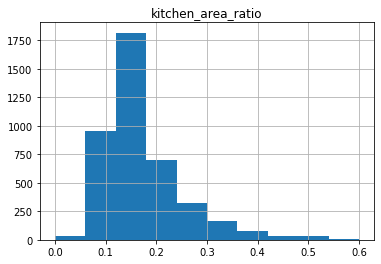

In [205]:
data_spb_center.hist('kitchen_area_ratio',range=(0,0.6),bins=10)

In [206]:
data_spb_center.describe()['living_area_ratio']

count    4140.000000
mean        0.578511
std         0.109611
min         0.021583
25%         0.521665
50%         0.580410
75%         0.654690
max         0.983447
Name: living_area_ratio, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca75ebf10>]],
      dtype=object)

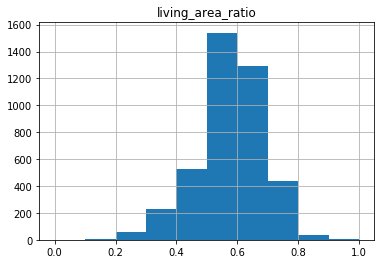

In [207]:
data_spb_center.hist('living_area_ratio',range=(0,1),bins=10)

Видно, что для квартир в центре значения немного отличаются: 
- Среднее и медианное значение доли кухни немного уменьшилось с 0.186 и 0.172 до 0.174 и 0.16, соответственно. 
- Среднее и медианные значения доли жилой площади увеличилось с 0.566 до 0.58.

Возможно это связано с тем, что квартиры в центре в основном из старого фонда, и в то время кухни делали немного меньше, чем сейчас, а жилые площади наоборот - чуть больше.

#### Цена

Изучим значения и построим гистограмму.

In [208]:
data_spb_center.describe()['last_price']

count    4.140000e+03
mean     1.415791e+07
std      2.353420e+07
min      1.600000e+06
25%      6.450000e+06
50%      8.950000e+06
75%      1.390000e+07
max      7.630000e+08
Name: last_price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca757ba90>]],
      dtype=object)

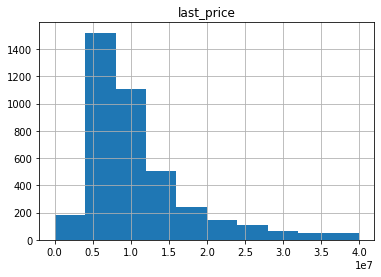

In [209]:
data_spb_center.hist('last_price',range=(0,40e6),bins=10)

Результаты очевидны, квартиры в центральной области дороже:
- Среднее значение цены - 14 млн. рублей вместо 6.5 млн. для всего датасета.
- Медианное значение - 9 млн. рублей вместо 4.65 млн. для всего датасета.

#### Количество комнат

Изучим значения и построим гистограмму.

In [210]:
data_spb_center.describe()['rooms']

count    4140.000000
mean        2.757971
std         1.424214
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca749a390>]],
      dtype=object)

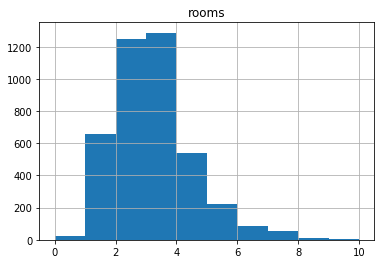

In [211]:
data_spb_center.hist('rooms',range=(0,10),bins=10)

Полученные данные показывают, что центральные квартиры больше по комнатам:
- Среднее и медианное значения в данном случае составляют 3 комнаты вместо 2 для всего датасета.

#### Высота потолков

Изучим значения и построим гистограмму.

In [212]:
data_spb_center.describe()['ceiling_height']

count    4140.000000
mean        2.962884
std         1.724841
min         2.000000
25%         2.650000
50%         2.800000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca749a710>]],
      dtype=object)

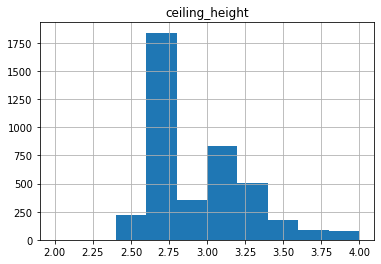

In [213]:
data_spb_center.hist('ceiling_height',range=(2,4),bins=10)

На данных видно, что потолки в центральных квартирах выше:
- Медианное значение - 2.8 м, среднее - почти 3 м. Для всего датасета значения 2.65 и 2.72 м, соответственно.
- Гистограмма показала, что распределение высоты потолков для центральных квартир - бимодальное, так как наблюдается пик не только возле 2.65 м, но и возле 3.1 м. 

#### Время продажи

Изучим значения и построим гистограмму времени продажи центральных квартир, отбросив "выбросы".

In [214]:
data_spb_center.query('1 < days_exposition').describe()['days_exposition']

count    3476.000000
mean      241.413982
std       270.900326
min         3.000000
25%        60.000000
50%       136.000000
75%       335.000000
max      1572.000000
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feca73cc210>]],
      dtype=object)

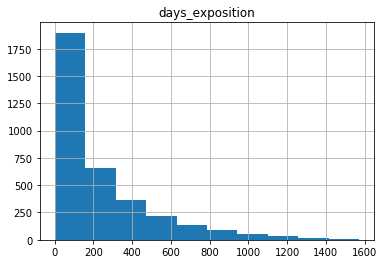

In [215]:
data_spb_center.hist('days_exposition',range=(1,data_spb['days_exposition'].max()),bins=10)

Видно, что в медианное и среднее значение для центральных квартир немного отличается от всего датасета:
- Половина квартир продавалась уже не за 3 месяца, а за 4.5 месяца. 
- В среднем центральные квартиры продаются уже не за 6 месяцев, а за 8.

### Что влияет на стоимость центральных квартир

#### Площадь

Изучим данные, построим данные и посчитаем коэффициент корреляции для центральных квартир, не учитывая при этом "выбросы".

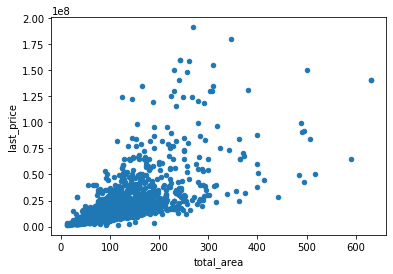

In [216]:
data_spb_center.query('last_price < 2e8').plot(x='total_area', y='last_price', kind='scatter')

In [217]:
data_spb_center.query('last_price < 2e8')['last_price'].corr(data['total_area'])

0.7119496497014527

Коэффициент корреляции в данном случае составил 0.712 вместо 0.74 для всего датасета. Можно сделать вывод, что стоимость квартир в центре зависит от площади чуть меньше, чем остальные квартиры. Как мы видели выше, стоимость центральных квартир сильно зависит от расположения. 

#### Количество комнат

Повторим прошлые вычисления для центральных квартир и построим график.

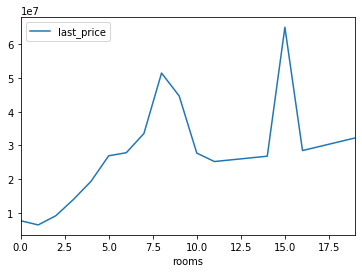

In [218]:
(pd.
    pivot_table(data_spb_center.query('last_price < 2e8'), 
                index='rooms', 
                values='last_price', 
                aggfunc='mean').
    plot(kind='line')
)

Видно, что стоимость центральных квартир зависит от количества комнат так же, как и остальные квартиры (наблюдаются даже те же характерные пики).

#### Удаленность от центра

Изучим данные, построим данные и посчитаем коэффициент корреляции для центральных квартир, не учитывая при этом "выбросы".

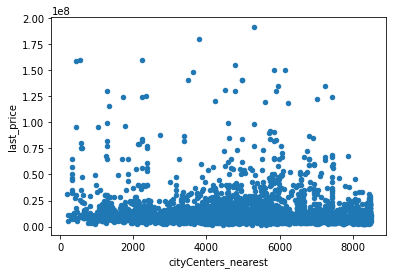

In [219]:
data_spb_center.query('last_price < 2e8').plot(x='cityCenters_nearest', y='last_price', kind='scatter')

In [220]:
data_spb_center.query('last_price < 2e8')['last_price'].corr(data['cityCenters_nearest'])

-0.09823758768561383

По полученным данным также можно сказать, что:
- Цена центральных квартир слабо зависит от расстояния до центра. 
- Нет прямой зависимости между ценой и расстоянием, а есть какие-то центральные районы, в которых в среднем цена на квартиры выше (например, в области 4-6 км).

#### Этаж

Построим столбчатую диаграмму со среднем и медианным значениям цены для всех групп этажей.

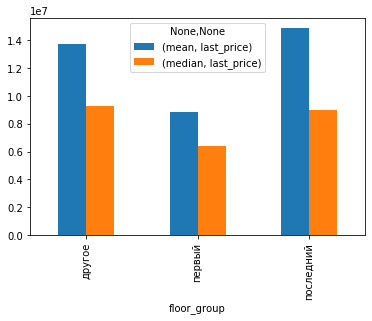

In [221]:
(pd.
    pivot_table(data_spb_center.query('last_price < 2e8'), 
                index='floor_group', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='bar')
)

Для центральных квартир наблюдаются почти те же закономерности:
- Квартиры на первом этаже ценятся меньше всего.
- Медианы квартир на последнем этаже и всех остальных этажах равны.
- Средняя цена квартир на последнем этаже выше остальных.

#### Год публикации

Создадим сводную таблицу со средним и медианным значениями цены центральных квартир в зависимости от года публикации и построим на их основе график.

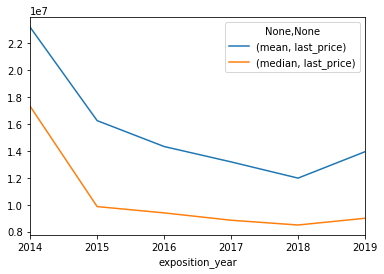

In [222]:
(pd.
    pivot_table(data_spb_center.query('last_price < 2e8'), 
                index='exposition_year', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='line')
)

Для центральных квартир зависимости их стоимости от года публикации не отличаются от всех остальных квартир.

#### Месяц публикации

Создадим сводную таблицу со средним и медианным значениями цены центральных квартир в зависимости от месяца публикации и построим на их основе график.

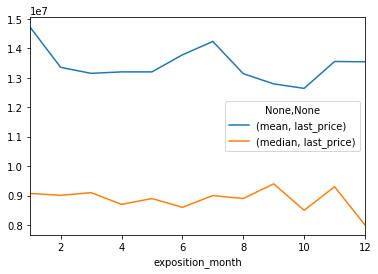

In [226]:
(pd.
    pivot_table(data_spb_center.query('last_price < 2e8'), 
                index='exposition_month', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='line')
)

В данном случае также не наблюдается зависимости от месяца публикации объявления о продаже квартиры.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Отчетливо видим сезонность

<div class="alert alert-info"> <b>Комментарий студента:</b> Я не стал делать выводы о сезонности в данном случае, так как их видно только на среднем значении, но не на медианном.
    
</div>

#### День недели публикации

Создадим сводную таблицу со средним и медианным значениями цены центральных квартир в зависимости от дня недели публикации и построим на их основе график.

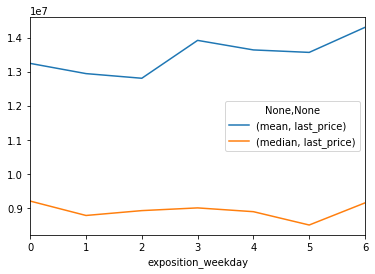

In [1390]:
(pd.
    pivot_table(data_spb_center.query('last_price < 2e8'), 
                index='exposition_weekday', 
                values='last_price', 
                aggfunc=['mean','median']).
    plot(kind='line')
)

В данном случае не наблюдается определенных закономерностей.

**Вывод**

В данном пункты был проведен исследовательский анализ данных:
- Были изучены распределения таких параметров как цена, площадь, число комнат, высота потолков и время продажи для всех квартир.
- Было определено, как влияет площадь, количество комнат, удаленность от центра, этаж, а также время подачи объявления на стоимость квартир.
- Были определены самые популярные населенные пункты, а также минимальное и максимальное значение стоимости квадратного метра для них. 
- Путем построения зависимости цены квартиры от удаленности от центра была определена область, которая относится к центру.
- Были проанализированы те же параметры и построены те же зависимости, что и для всех квартир, но уже для квартир, которые относятся к центральной области.

## Общий вывод

В данной работе были проанализированы данные об объявлениях о продаже квартир в Санкт-Петербурге и соседних населенных пунктах:
1. Был проведен первичный анализ датасета.
2. Проведена первичная обработка данных, а именно:
    - Обработка дубликатов и пропусков. 
    - Смена типов данных, где это необходимо. 
    - Для удаления неявных дубликатов из названий населенных пунктов был удален его тип, и оставлено только непосредственно само наименование. Однако, дубликатов в данных не оказалось.
3. Были рассчитаны значения с целью их использования при дальнейшем анализе:
    - Цены квадратного метра. 
    - Дня недели, месяца и года публикации.
    - Проведена категоризация квартир по этажам.
    - Посчитаны соотношения жилой площади и площади кухни к общей площади квартир.
4. Был проведен исследовательский анализ данных:
    - Определены самые популярные населенные пункты, посчитаны средние значения цены за квадратный метр в них. В Санкт-Петербурге цена за квадратный метр оказалась максимальной, в Выборге - минимальной.
    - Исходя из зависимости цены от расстояния до центра была определена область, которая относится к "центру". Оказалось, что квартиры, находящиеся ближе 9 км к центру сильно дороже других.
    - Был проведен анализ различных параметров как для всех квартир, так и отдельно для квартир, относящихся к центру. Квартиры в центре, очевидно, дороже. Но также оказалось, что они в среднем обладают большей площадью, большим количеством комнат, более высокими потолками и дольше продаются. Также они обладают чуть меньшими кухнями и чуть большей жилой площадью.
    - Ни для квартир в центре, ни для всех квартир, не было обнаружено прямой зависимости между днем недели подачи объявления и месяцем. Что касается года подачи, то было обнаружено, что с 2014 по 2018 в среднем цена квартир падала, и в 2019 опять начала расти как для всех квартир, так и для квартир в центре.
    - Было определено, что цена на все квартиры хорошо коррелирует с площадью и количеством комнат в квартирах. При этом наблюдается слабая корреляция стоимости квартир от удаленности от центра (но в центральных районах квартиры в целом дороже). Квартиры на первом этаже обычно дешевле, чем квартиры на других этажах.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Предобработка данных - важнейший этап работы с данными. Спасибо, что не забыл о нем в выводе. Получился очень хорщий подробный отчет о проделанной работе. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>  
    
Спасибо за сильный проект! Видно, что ты не только внимательно работаешь с данными, но еще и подходишь к работе как аналитик. Критичных замечаний нет, но я бы хотела, чтобы мы поработали с корреляцией. Оставила направляющие комментарии по ходу решения.
    
Возвращаю проект, что бы ты смог задать вопросы и уточнить мои комментарии, если тебе что-то не понятно. 
    
Жду твою работу на финальное ревью!

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за ревью! Некоторые вещи уже посмотрел как исправить, некоторые постараюсь учесть в следующих проектах.
    
</div>

<div class="alert alert-info"> <b>Комментарий ревьюера:</b> Спасибо за работу! Надеюсь, мои комментарии были полезны. Удачи на следующих этапах!</div>